In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
import statsmodels.stats.api as sms
import numpy as np

/Users/jakekong/.pyenv/versions/3.6.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 전처리

### outcometype encoding by      "LabelEncoder"

In [2]:
df = pd.read_csv("train.csv")

df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [3]:
outcometype0 = df["OutcomeType"]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(outcometype0)

OutcomeType = le.transform(outcometype0)

### animaltype encoding by "LabelBinarizer"

In [4]:
animaltype0 = df["AnimalType"]

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(animaltype0)

AnimalType = lb.transform(animaltype0)

In [5]:
print(lb.classes_)
#good

['Cat' 'Dog']


### sexuponoutcome encoding by "LabelEncoder" & NaN value preprocessing
- 이미 'Unknown' 이라는 값이 존재 함으로 LablEncoder를 통해 nan값을 'Unknown'으로 통일시켜줌 (하나의 class type이 단축됨)

In [6]:
sextype0 = df["SexuponOutcome"]
nan_processed_sextype = sextype0.replace(np.nan, 'Unknown')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(nan_processed_sextype)

SexuponOutcome = le.transform(nan_processed_sextype)

In [7]:
print(le.classes_)


['Intact Female' 'Intact Male' 'Neutered Male' 'Spayed Female' 'Unknown']


### ageuponoutcome  encoding from STR to INT, then another encoding by "LabelEncoder"

In [8]:
age = df['AgeuponOutcome']

nan_processed_age = age.replace(np.nan, 'unknown')
list_age = []
for i in nan_processed_age:
    if i == 'unknown':
        i = 0
    else:
        i = i.split(" ")
    list_age.append(i)


for i in list_age:
    if i == 0:
        continue
    elif i[1] == 'year' or i[1] == 'years':
        i[1] = 365
    elif i[1] == 'month' or i[1] == 'months':
        i[1] = 30
    elif i[1] == 'week' or i[1] == 'weeks':
        i[1] = 7
    else:
        i[1] = 1


for i in list_age:
    if i == 0:
        continue
    else:
        i[0] = int(i[0])


AgeuponOutcome = []
for i in list_age:
    if i == 0:
        AgeuponOutcome.append(i)
    else:
        i = i[0]*i[1]
        AgeuponOutcome.append(i)

#AgeuponOutcome

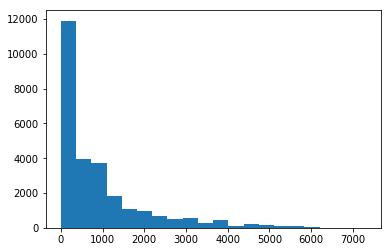

In [9]:
plt.hist(AgeuponOutcome, bins=20)
plt.show()

### breed represented by taking dominant breed (if mixed), then encoding by "LabelEncoder"

In [10]:
breed0 = df["Breed"]

breed = []
for i in breed0:
    
    i = i.split("/")
    
    breed.append(i)

#--------------------------------------------------------#
dominant = []
for i in breed:
    if len(i) == 2:
        i.remove(i[1])
    elif len(i) ==3:
        i.remove(i[2])
    dominant.append(i)  

#--------------------------------------------------------#

breedtype0 = []
for i in dominant:
    if len(i) == 2:
        if i[1] == "Black":
            i.remove(i[1])
        else:
            i = ["Black Tan Hound"]
    breedtype0.append(i)
    
            
pd_breed = pd.DataFrame(breedtype0)
new_breed0 = pd_breed[0]

#--------------------------------------------------------#

for_off_mix = []

for i in new_breed0:
    
    i = i.split(" ")
    
    for_off_mix.append(i)

#--------------------------------------------------------#

off_mix = []
for i in for_off_mix:
    if "Mix" in i:
        i.remove("Mix")
    off_mix.append(i)
    
#--------------------------------------------------------#

Breed1 = []
for i in off_mix:
    if len(i) == 1:
        i = i[0]
    elif len(i) == 2:
        i = i[0] + " " + i[1]
    elif len(i) == 3:
        i = i[0] + " " + i[1] + " " + i[2]
    elif len(i) == 4:
        i = i[0] + " " + i[1] + " " + i[2] + " " + i[3]
    elif len(i) == 5:
        i = i[0] + " " + i[1] + " " + i[2] + " " + i[3] + " "+ i[4]
    
    
    Breed1.append(i)


#--------------------------------------------------------#

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(Breed1)

Breed = le.transform(Breed1)
Breed_classes = le.classes_
print(len(le.classes_))
print(le.classes_)

221
['Abyssinian' 'Affenpinscher' 'Afghan Hound' 'Airedale Terrier' 'Akita'
 'Alaskan Husky' 'Alaskan Malamute' 'American Bulldog' 'American Eskimo'
 'American Foxhound' 'American Pit Bull Terrier' 'American Shorthair'
 'American Staffordshire Terrier' 'Anatol Shepherd' 'Angora'
 'Australian Cattle Dog' 'Australian Kelpie' 'Australian Shepherd'
 'Australian Terrier' 'Balinese' 'Basenji' 'Basset Hound' 'Beagle'
 'Bearded Collie' 'Beauceron' 'Bedlington Terr' 'Belgian Malinois'
 'Belgian Sheepdog' 'Belgian Tervuren' 'Bengal' 'Bernese Mountain Dog'
 'Bichon Frise' 'Black' 'Black Mouth Cur' 'Black Tan Hound' 'Bloodhound'
 'Blue Lacy' 'Bluetick Hound' 'Boerboel' 'Bombay' 'Border Collie'
 'Border Terrier' 'Boston Terrier' 'Boxer' 'Boykin Span'
 'British Shorthair' 'Brittany' 'Bruss Griffon' 'Bull Terrier'
 'Bull Terrier Miniature' 'Bulldog' 'Bullmastiff' 'Burmese' 'Cairn Terrier'
 'Canaan Dog' 'Cane Corso' 'Cardigan Welsh Corgi' 'Carolina Dog'
 'Catahoula' 'Cavalier Span' 'Chesa Bay Retr' 'C

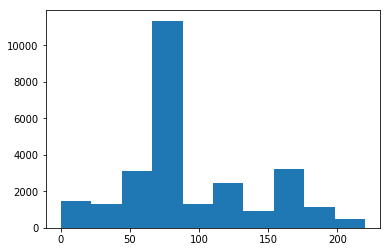

In [12]:
plt.hist(Breed)
plt.show()

In [13]:
print (Breed_classes[66:89])

['Cocker Spaniel' 'Collie Rough' 'Collie Smooth' 'Cornish Rex' 'Cymric'
 'Dachshund' 'Dachshund Longhair' 'Dachshund Wirehair' 'Dalmatian'
 'Devon Rex' 'Doberman Pinsch' 'Dogo Argentino' 'Dogue De Bordeaux'
 'Domestic Longhair' 'Domestic Medium Hair' 'Domestic Shorthair'
 'Dutch Shepherd' 'English Bulldog' 'English Cocker Spaniel'
 'English Coonhound' 'English Foxhound' 'English Pointer' 'English Setter']


In [14]:
Breed11 = pd.DataFrame(Breed1, columns = ['breed'])


Brid = Breed11.groupby("breed")

group = Brid.groups


Brid.size().sort_values(ascending = False)
  


breed
Domestic Shorthair             8958
Chihuahua Shorthair            2145
Pit Bull                       2113
Labrador Retriever             1915
Domestic Medium Hair            883
German Shepherd                 826
Domestic Longhair               547
Australian Cattle Dog           511
Dachshund                       510
Siamese                         426
Boxer                           360
Border Collie                   334
Miniature Poodle                310
Australian Shepherd             229
Yorkshire Terrier               226
Jack Russell Terrier            222
Beagle                          220
Miniature Schnauzer             220
Catahoula                       218
Rat Terrier                     215
Siberian Husky                  194
Rottweiler                      181
Shih Tzu                        176
Chihuahua Longhair              168
Cairn Terrier                   142
Pointer                         139
Great Pyrenees                  131
American Bulldog      

### color encoding

In [15]:
color = df["Color"]

In [16]:
len(color.unique())

366

In [17]:
div_color = []
for i in color:
    i = i.split("/")[0]
    div_color.append(i)

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(div_color)

Color = le.transform(div_color)
Color_classes = le.classes_
print(len(le.classes_))
print(le.classes_)

57
['Agouti' 'Apricot' 'Black' 'Black Brindle' 'Black Smoke' 'Black Tabby'
 'Black Tiger' 'Blue' 'Blue Cream' 'Blue Merle' 'Blue Point' 'Blue Smoke'
 'Blue Tabby' 'Blue Tick' 'Blue Tiger' 'Brown' 'Brown Brindle'
 'Brown Merle' 'Brown Tabby' 'Brown Tiger' 'Buff' 'Calico' 'Calico Point'
 'Chocolate' 'Chocolate Point' 'Cream' 'Cream Tabby' 'Fawn' 'Flame Point'
 'Gold' 'Gray' 'Gray Tabby' 'Lilac Point' 'Liver' 'Liver Tick' 'Lynx Point'
 'Orange' 'Orange Tabby' 'Orange Tiger' 'Pink' 'Red' 'Red Merle' 'Red Tick'
 'Ruddy' 'Sable' 'Seal Point' 'Silver' 'Silver Lynx Point' 'Silver Tabby'
 'Tan' 'Torbie' 'Tortie' 'Tortie Point' 'Tricolor' 'White' 'Yellow'
 'Yellow Brindle']


In [19]:
fin_col = pd.DataFrame(div_color, columns = ['Color'])


haha = fin_col.groupby("Color")



haha.size().sort_values(ascending = False)
  


Color
Black                6422
White                3344
Brown Tabby          2592
Brown                1951
Tan                  1674
Orange Tabby         1299
Blue                 1199
Tricolor              800
Red                   779
Brown Brindle         699
Blue Tabby            678
Tortie                580
Calico                552
Chocolate             448
Torbie                398
Sable                 324
Cream Tabby           277
Buff                  267
Yellow                230
Gray                  227
Cream                 221
Fawn                  209
Lynx Point            183
Blue Merle            165
Seal Point            158
Black Brindle          99
Flame Point            85
Gold                   77
Brown Merle            72
Black Smoke            62
Black Tabby            61
Silver                 53
Red Merle              52
Gray Tabby             51
Blue Tick              44
Orange                 43
Silver Tabby           41
Red Tick               40
Lilac 